In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\aligh\anaconda3\envs\dmproject\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
data = pd.read_csv('../data/final_preprocessed_data_points.csv')

In [ ]:
def AnotherMethodNutriScore(data):
    # Select columns of interest
    columns_of_interest = ['energy-kj_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
                           'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sodium_100g',
                           'nutrition_grade_fr']  # Include the target column

    # Filter the dataset to columns of interest
    filtered_data = data[columns_of_interest]

    # Handle missing values if any
    filtered_data.dropna(inplace=True)

    # Separate features and target variable
    X = filtered_data.drop('nutrition_grade_fr', axis=1)
    y = filtered_data['nutrition_grade_fr']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict Nutri-scores
    predicted_scores = clf.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, predicted_scores)
    print(f"Accuracy of the model: {accuracy}")

    # Get the IDs of the test set
    test_ids = X_test.index.tolist()

    # Create a DataFrame to store IDs, original and predicted Nutri-scores
    results = pd.DataFrame({
        '_id': test_ids,
        'Original_NutriScore': y_test.values,
        'Predicted_NutriScore': predicted_scores
    })

    return results, X_test, y_test, clf

In [ ]:
predicted_nutri_scores, X_test, y_test, clf = AnotherMethodNutriScore(data)

Accuracy of the model: 0.6818181818181818


C:\Users\aligh\AppData\Local\Temp\ipykernel_36704\3297679531.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


# Confusion Matrix

Confusion Matrix:
Predicted   a  b  c  e
Actual                
a          18  3  2  0
b           0  8  1  0
c           1  1  4  1
d           0  0  5  0


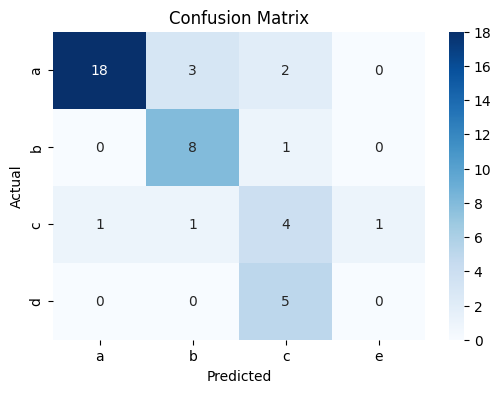

In [ ]:
# Create a confusion matrix using crosstab
confusion_matrix = pd.crosstab(predicted_nutri_scores['Original_NutriScore'], predicted_nutri_scores['Predicted_NutriScore'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(confusion_matrix)
# Plotting the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Assuming 'clf' is your trained classifier and 'X_test, y_test' are your test data
plot_roc_curve(clf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

ValueError: The target y is not binary. Got continuous-multioutput type of target.